## <center>Disordered and complex systems</center>

# <center>One dimensional random walks.</center>


**Author:** João António - joaoantant@gmail.com \& github.com/JoaoAnt/.

**Based on:** the instructions for Project 2 from professor Alexander V. Goltsev.

**The ipybn can be found in:** the Github in the WaddlePortfolio/Projects.

# Table of Contents:

* 1. One-dimensional random walks with symmetric jumps.
    * 1.1.Plot three trajectories of random walks.
    * 1.2.Plot to compare simulations and theoretical distribution for t= 41, 401 and 4001.
* 2. Random walks with a drift.
    * 2.1.Plot three trajectories of random walks.
    * 2.2.Plot to compare simulations and theoretical distribution for t= 41, 401 and 4001.

# 1. One-dimensional random walks with symmetric jumps.

In [1]:
#Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
#Initial inputs
prob = [0.5, 0.5] #Probability to go down or up (or left and right).
N=100000 # Number of Trajectories, just to generate better statistics
tmax_to_test=(41,401, 4001)

## 1.1.Plot three trajectories of random walks.

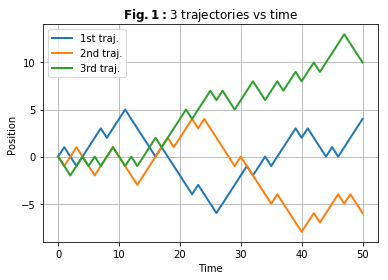

In [3]:
tmax=50
for Trajectories in range (0, 3):
    Traj=[0]
    X=0
    for t in range (1, tmax+1):
        random_numbers = np.random.random(1)
        if random_numbers[0] < prob[0]:
            X-=1
        else:
            X+=1
        Traj.append(X)
    plt.plot(Traj, lw=2)
    
plt.legend(['1st traj.','2nd traj.','3rd traj.'])
plt.ylabel('Position')
plt.xlabel('Time')
plt.title(r"$\bf{Fig.1:}$"+'3 trajectories vs time')
plt.grid(True)
plt.show()

The 3 possible trajectories for symmetric jumps with time equal to 50 are plotted in **Fig.1.** The probability of going left is represented by going down, and going right is going up, this to make the x-axis be the time, as it is commonly used in graphs.

We can also see that at even times, the trajectory has to end in an even location and the same happens for odd times with odd positions.

## 1.2.Plot to compare simulations and theoretical distribution for t= 41, 401 and 4001. <a class="anchor" id="12"></a>

The theoretical curve is given by:
\begin{equation*}
    P_{theoretical}(x,t)=\frac{1}{\sqrt{2 \pi t}} e^{\frac{-x^2}{2 t}}
\end{equation*}

Using t equal to 41
Sum of (P̅) =  1.0
Sum of (P̅*x) =  0.00997
Sum of (P̅*x^2) =  40.40506
Max of (P̅) =  0.06288
x of Max(P̅) =  0

Using t equal to 401
Sum of (P̅) =  1.0
Sum of (P̅*x) =  -0.07565
Sum of (P̅*x^2) =  401.2237
Max of (P̅) =  0.020015
x of Max(P̅) =  3

Using t equal to 4001
Sum of (P̅) =  1.0
Sum of (P̅*x) =  -0.02706
Sum of (P̅*x^2) =  4018.41898
Max of (P̅) =  0.006475
x of Max(P̅) =  1



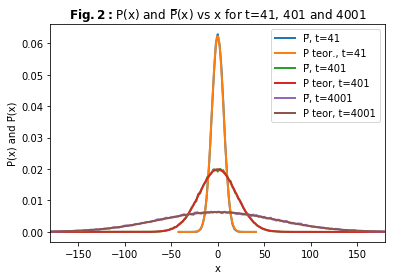

In [4]:
AllP=[]
AllPT=[]
for tmax in tmax_to_test:
    X_t1=[]
    X_t2=[]
    P=[0]*(tmax*2+2)
    P_teorical=[0]*(tmax*2+2)
    #Random Walk
    for Trj in range(0, N):
        random_numbers = np.random.random(tmax)
        n_neg1= sum(random_numbers[:-1] < prob[0])
        n_neg2= sum(random_numbers < prob[0])
        n_pos1= sum(random_numbers[:-1] > prob[0])
        n_pos2= sum(random_numbers > prob[0])
        X_t1.append(-n_neg1+n_pos1)
        X_t2.append(-n_neg2+n_pos2)
    for x in range (-tmax, tmax+1):
        P[x+tmax+1]=1/2*(X_t1.count(x)/N+X_t2.count(x)/N)
        P_teorical[x+tmax+1]=1/np.sqrt(2*np.pi*tmax)*np.exp((-x**2)/(2*tmax))
    #Check of step 2
    Check1=sum(P)
    Check2=[0]*(tmax*2+2)
    Check3=[0]*(tmax*2+2)
    for x in range (-tmax, tmax+1):
        Check2[x+tmax+1]=P[x+tmax+1]*x
        Check3[x+tmax+1]=P[x+tmax+1]*x**2
    print('Using t equal to', tmax)
    print('Sum of (P\u0305) = ', round(Check1,5))
    print('Sum of (P\u0305*x) = ', round(sum(Check2),5))
    print('Sum of (P\u0305*x^2) = ', round(sum(Check3),5))
    print('Max of (P\u0305) = ', max(P))
    A=range(-(tmax+1),(tmax+1))
    B=A[P.index(max(P))]
    print('x of Max(P\u0305) = ', B)
    print()
    #Plot P and P_teorical
    plt.plot(A,P, lw=2)
    plt.plot(A,P_teorical, lw=2)
    AllP.append(P)
    AllPT.append(P_teorical)
plt.legend(['P\u0305, t=41','P teor., t=41','P\u0305, t=401','P teor, t=401','P\u0305, t=4001','P teor, t=4001'])
plt.title(r"$\bf{Fig.2:}$"+'P(x) and P\u0305(x) vs x for t=41, 401 and 4001')
plt.xlabel('x')
plt.ylabel('P(x) and P\u0305(x)')
plt.xlim(-180, 180)
plt.show()

The 'Sum of ($\bar P$)' that should be 1, 'Sum of ($\bar P$x)' that should be 0, 'Sum of ($\bar P x^2$)' that should be "t" and the 'x of Max($\bar P$)' should be 0. This theoretical values are not the ones obtained, however they are very close.

In the $\bf{Fig.2}$ is plotted the comparison between the obtained curves and the predictions. Once more, the curves are very similar to the prediction. This is better seen in the following Figures (3, 4 and 5).

For each curve, it is only plotted from -t until t, since those are the limits that the position may assume. The only curves that show the limits in this Figure are t=41 curves.

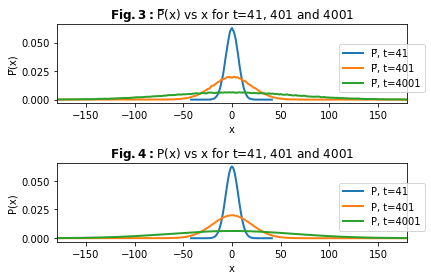

In [5]:
i=0
fig, axs = plt.subplots(2, 1)
for tmax in tmax_to_test:    
    A=range(-(tmax+1),(tmax+1))
    axs[0].plot(A, AllP[i], lw=2)
    i+=1
axs[0].set_xlabel('x')
axs[0].set_ylabel('P\u0305(x)')
axs[0].set_title(r"$\bf{Fig.3:}$"+'P\u0305(x) vs x for t=41, 401 and 4001')
axs[0].legend(['P\u0305, t=41','P\u0305, t=401','P\u0305, t=4001'], bbox_to_anchor=(1.05,0.75), borderaxespad=0)

axs[0].set_xlim(-180, 180)
i=0
for tmax in tmax_to_test:
    A=range(-(tmax+1),(tmax+1))
    axs[1].plot(A,AllPT[i], lw=2)
    i+=1
axs[1].set_xlabel('x')
axs[1].set_ylabel('P(x)')
axs[1].set_title(r"$\bf{Fig.4:}$"+'P(x) vs x for t=41, 401 and 4001')
axs[1].legend(['P, t=41','P, t=401','P, t=4001'], bbox_to_anchor=(1.05,0.75), borderaxespad=0)
axs[1].set_xlim(-180, 180)
fig.tight_layout()
plt.show()

The $\bf{Fig.3}$ is the values obtained with N particles (N = 100000), the $\bf{Fig.4}$ is the theoretical prediction.

In this 2 figures ($\bf{Fig.3}$ and $\bf{Fig.4}$) is more evident that the curves are the same behavior and values.

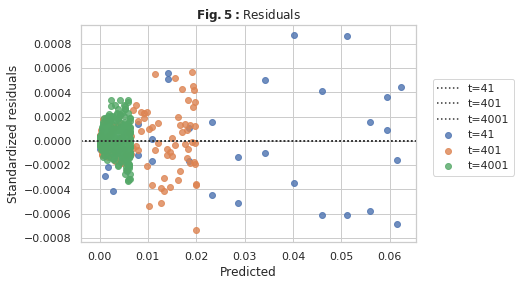

In [6]:
sns.set(style="whitegrid")
for x in range(0,3):
    sns.residplot(AllPT[x], AllP[x])
plt.legend(['t=41','t=401','t=4001','t=41','t=401','t=4001'], bbox_to_anchor=(1.05,0.75), borderaxespad=0)
plt.title(r"$\bf{Fig.5:}$"+'Residuals')
plt.xlabel('Predicted')
plt.ylabel('Standardized residuals')
plt.show()

In $\bf{Fig.5}$ is possible to see how small are the residuals between the curves, as we can see they have a maximum difference of 0.001, which is very small.

We can also see that the residuals increase with the decrease in time, as expected.

# 2. Random walks with a drift.

In [4]:
#Initial inputs
delt=0.015
prob = [0.5-delt, 0.5+delt] #Probability to go down or up (or left and right).

## 2.1.Plot three trajectories of random walks.<a class="anchor" id="21"></a>

For comparison we can still draw three trajectories for this new random walk:

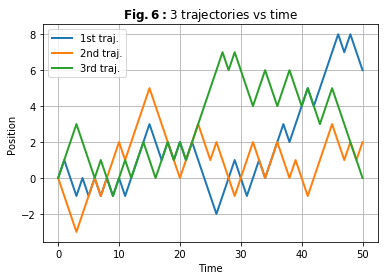

In [5]:
tmax=50
for Trajectories in range (0, 3):
    Traj=[0]
    X=0
    for t in range (1, tmax+1):
        random_numbers = np.random.random(1)
        if random_numbers[0] < prob[0]:
            X-=1
        else:
            X+=1
        Traj.append(X)
    plt.plot(Traj, lw=2)
plt.legend(['1st traj.','2nd traj.','3rd traj.'])
plt.ylabel('Position')
plt.xlabel('Time')
plt.title(r"$\bf{Fig.6:}$"+'3 trajectories vs time')
plt.grid(True)
plt.show()

These trajectories go, on average, more to the positive side of x (or to the right), as seen in $\bf{Fig.6}$, when compared with the $\bf{Fig.1}$ of the same type.

## 2.2.Plot to compare simulations and theoretical distribution for t= 41, 401 and 4001. <a class="anchor" id="22"></a>

The theoretical curve is given by:
\begin{equation*}
    P_{theoretical}(x,t)=\frac{1}{\sqrt{2 \pi t}} e^{\frac{-(x-2t\delta)²}{2 t}}
\end{equation*}

p= 0.485 q= 0.515

Using t equal to 41
Sum of (P̅) =  1.0
Sum of (P̅*(x-2tδ)) =  0.00356
Sum of (P̅*(x-2tδ)^2) =  40.54732
Max of (P̅) =  0.06229
x of Max(P̅) =  2

Using t equal to 401
Sum of (P̅) =  1.0
Sum of (P̅*(x-2tδ)) =  -0.04354
Sum of (P̅*(x-2tδ)^2) =  401.26277
Max of (P̅) =  0.02028
x of Max(P̅) =  10

Using t equal to 4001
Sum of (P̅) =  1.0
Sum of (P̅*(x-2tδ)) =  0.01006
Sum of (P̅*(x-2tδ)^2) =  3998.32396
Max of (P̅) =  0.00654
x of Max(P̅) =  117



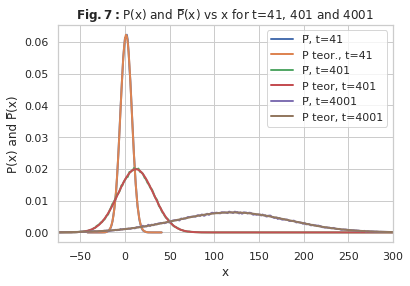

In [10]:
AllP=[]
AllPT=[]
print('p=',prob[0],'q=',prob[1])
print()
for tmax in tmax_to_test:
    X_t1=[]
    X_t2=[]
    P=[0]*(tmax*2+2)
    
    P_teorical=[0]*(tmax*2+2)
    
    #Random Walk
    for Trj in range(0, N):
        random_numbers = np.random.random(tmax)
        n_neg1= sum(random_numbers[:-1] < prob[0])
        n_neg2= sum(random_numbers < prob[0])
        n_pos1= sum(random_numbers[:-1] > prob[0])
        n_pos2= sum(random_numbers > prob[0])
        
        X_t1.append(n_pos1-n_neg1)
        X_t2.append(n_pos2-n_neg2)
    
    for x in range (-tmax, tmax+1):
        P[x+tmax+1]=1/2*(X_t1.count(x)/N+X_t2.count(x)/N)
        P_teorical[x+tmax+1]=1/np.sqrt(2*np.pi*tmax)*np.exp((-(x-2*tmax*delt)**2)/(2*tmax))
    
    #Check of step 2
    Check1=sum(P)
    Check2=[0]*(tmax*2+2)
    Check3=[0]*(tmax*2+2)
    for x in range (-tmax, tmax+1):
        Check2[x+tmax+1]=P[x+tmax+1]*(x-2*tmax*delt)
        Check3[x+tmax+1]=P[x+tmax+1]*(x-2*tmax*delt)**2
    
    print('Using t equal to', tmax)
    print('Sum of (P\u0305) = ', round(Check1,5))
    print('Sum of (P\u0305*(x-2t\u03B4)) = ', round(sum(Check2),5))
    print('Sum of (P\u0305*(x-2t\u03B4)^2) = ', round(sum(Check3),5))
    print('Max of (P\u0305) = ', round(max(P),5))
    
    A=range(-(tmax+1),(tmax+1))
    B=A[P.index(max(P))]
    print('x of Max(P\u0305) = ', B)
    print()
    
    #Plot P and P_teorical
    A=range(-(tmax+1),(tmax+1))
    plt.plot(A,P, lw=2)
    plt.plot(A,P_teorical, lw=2)
    AllP.append(P)
    AllPT.append(P_teorical)
    
plt.legend(['P\u0305, t=41','P teor., t=41','P\u0305, t=401','P teor, t=401','P\u0305, t=4001','P teor, t=4001'])
plt.title(r"$\bf{Fig.7:}$"+'P(x) and P\u0305(x) vs x for t=41, 401 and 4001')
plt.xlabel('x')
plt.ylabel('P(x) and P\u0305(x)')
plt.xlim(-75, 300)
plt.show()

The 'Sum of ($\bar P$)' that should be 1, 'Sum of ($\bar P (x - 2 t \delta)$)' that should be 0, 'Sum of ($\bar P (x-2t\delta)^2$)' that should be "t" and the 'x of Max($\bar P$)' that increases with t. This theoretical values are not the ones obtained, however they are very close.

In the $\bf{Fig.7}$ is plotted the comparison between the obtained curves and the predictions. Once more, the curves are very similar to the prediction (the following figures also exhibit this property even more). And once more we can see the limits of t=41.

The curves move to the right, since they have a bigger probability to jump to the right.

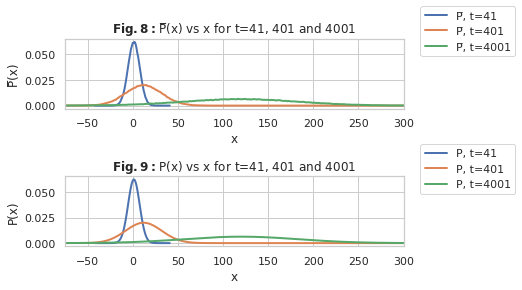

In [12]:
i=0
fig, axs = plt.subplots(2, 1)
for tmax in tmax_to_test:    
    A=range(-(tmax+1),(tmax+1))
    axs[0].plot(A, AllP[i], lw=2)
    i+=1
axs[0].set_xlabel('x')
axs[0].set_ylabel('P\u0305(x)')
axs[0].set_title(r"$\bf{Fig.8:}$"+'P\u0305(x) vs x for t=41, 401 and 4001')
axs[0].legend(['P\u0305, t=41','P\u0305, t=401','P\u0305, t=4001'], bbox_to_anchor=(1.05,0.75), borderaxespad=0)
axs[0].set_xlim(-75, 300)
i=0
for tmax in tmax_to_test:
    A=range(-(tmax+1),(tmax+1))
    axs[1].plot(A,AllPT[i], lw=2)
    i+=1
axs[1].set_xlabel('x')
axs[1].set_ylabel('P(x)')
axs[1].set_title(r"$\bf{Fig.9:}$"+'P(x) vs x for t=41, 401 and 4001')
axs[1].legend(['P, t=41','P, t=401','P, t=4001'], bbox_to_anchor=(1.05,0.75), borderaxespad=0)
axs[1].set_xlim(-75, 300)
fig.tight_layout()
plt.show()

The $\bf{Fig.8}$ is the values obtained with N particles, the $\bf{Fig.9}$ is the theoretical prediction.

In $\bf{Fig.8}$ and $\bf{Fig.9}$ we are able to see with in the previous figures it was not possible to distinguish between curves, they have the same behavior and values, just like in the previous section.

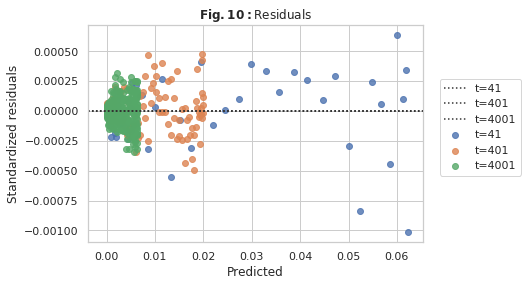

In [13]:
sns.set(style="whitegrid")
for x in range(0,3):
    sns.residplot(AllPT[x], AllP[x])
plt.legend(['t=41','t=401','t=4001','t=41','t=401','t=4001'], bbox_to_anchor=(1.05,0.75), borderaxespad=0)
plt.title(r"$\bf{Fig.10:}$"+'Residuals')
plt.xlabel('Predicted')
plt.ylabel('Standardized residuals')
plt.show()

Once more, in $\bf{Fig.10}$ we can see the residuals of the difference between the curves, once more the t=41 has the higher residuals, that are maximum for 0.001, making the curves very similar.

If the N - number of particles increased it is expected to see the residuals decrease in value, since now there was better statistics.